# Advanced DL and RL: Домашнее задание 1
Первое ДЗ связано с обучением с подкреплением, и оно придумано для ситуации, когда нейронные сети ещё не нужны, и пространство состояний в целом достаточно маленькое, чтобы можно было обучить хорошую стратегию методами TD-обучения или другими методами обучения с подкреплением. Задание получилось, надеюсь, интересное, но в том числе и достаточно техническое, так что для решения придётся немножко попрограммировать. Поэтому в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Любые комментарии, новые идеи и рассуждения на тему, как всегда, категорически приветствуются.

## Часть первая, с блекджеком и стратегиями
Мы будем обучаться играть в очень простую, но всё-таки знаменитую и популярную игру: блекджек. Правила блекджека достаточно просты; давайте начнём с самой базовой версии, которая реализована в OpenAI Gym:
численные значения карт равны от 2 до 10 для карт от двойки до десятки, 10 для валетов, дам и королей;
туз считается за 11 очков, если общая сумма карт на руке при этом не превосходит 21 (по-английски в этом случае говорят, что на руке есть usable ace), и за 1 очко, если превосходит;
игроку раздаются две карты, дилеру — одна в открытую и одна в закрытую;
игрок может совершать одно из двух действий:
hit  — взять ещё одну карту;
stand — не брать больше карт;
если сумма очков у игрока на руках больше 21, он проигрывает (bust);
если игрок выбирает stand с суммой не больше 21, дилер добирает карты, пока сумма карт в его руке меньше 17;
после этого игрок выигрывает, если дилер либо превышает 21, либо получает сумму очков меньше, чем сумма очков у игрока; при равенстве очков объявляется ничья (ставка возвращается);
в исходных правилах есть ещё дополнительный бонус за natural blackjack: если игрок набирает 21 очко с раздачи, двумя картами, он выигрывает не +1, а +1.5 (полторы ставки).
Именно этот простейший вариант блекджека реализован в OpenAI Gym:
https://github.com/openai/gym/blob/38a1f630dc9815a567aaf299ae5844c8f8b9a6fa/gym/envs/toy_text/blackjack.py


In [24]:
'''
В utils лежат все функции для выполнения задания: стратегии, mc, отрисовка графиков.
Про blackjack_custom_envs будет дан комментарий ниже.
'''

from blackjack_custom_envs import *
from utils import *

from gym.envs.toy_text.blackjack import *

import numpy as np

Рассмотрим очень простую стратегию: говорить stand, если у нас на руках комбинация в 19, 20 или 21 очко, во всех остальных случаях говорить hit. Используйте методы Монте-Карло, чтобы оценить выигрыш от этой стратегии.

In [4]:
env_blackjack = BlackjackEnv(natural=True)
seed = 7
env_blackjack.seed = seed # сразу зафиксирую сид
env_blackjack.action_space.seed = seed
env_blackjack._max_episode_steps = 1000

In [7]:
play(env_blackjack, simple_strategy)

([(10, 4, False), (20, 4, False)], [1, 0], [0.0, 1.0])

Оценим выигрыш простой стратегии

In [7]:
print(average_reward(env_blackjack, simple_strategy, n_episodes=100000))

-0.18058


Реализуйте метод обучения с подкреплением без модели (можно Q-обучение, но рекомендую попробовать и другие, например Monte Carlo control) для обучения стратегии в блекджеке, используя окружение Blackjack-v0 из OpenAI Gym.

Сколько выигрывает казино у вашей стратегии? Нарисуйте графики среднего дохода вашего метода (усреднённого по крайней мере по 100000 раздач, а лучше больше) по ходу обучения. Попробуйте подобрать оптимальные гиперпараметры.


Gamma: 0.1    Episode: 5000/100000    Reward: -0.06819.
Gamma: 0.1    Episode: 10000/100000    Reward: -0.06275.
Gamma: 0.1    Episode: 15000/100000    Reward: -0.06316.
Gamma: 0.1    Episode: 20000/100000    Reward: -0.05537.
Gamma: 0.1    Episode: 25000/100000    Reward: -0.06001.
Gamma: 0.1    Episode: 30000/100000    Reward: -0.06255.
Gamma: 0.1    Episode: 35000/100000    Reward: -0.060195.
Gamma: 0.1    Episode: 40000/100000    Reward: -0.05805.
Gamma: 0.1    Episode: 45000/100000    Reward: -0.05814.
Gamma: 0.1    Episode: 50000/100000    Reward: -0.05414.
Gamma: 0.1    Episode: 55000/100000    Reward: -0.05998.
Gamma: 0.1    Episode: 60000/100000    Reward: -0.05819.
Gamma: 0.1    Episode: 65000/100000    Reward: -0.059305.
Gamma: 0.1    Episode: 70000/100000    Reward: -0.054765.
Gamma: 0.1    Episode: 75000/100000    Reward: -0.056315.
Gamma: 0.1    Episode: 80000/100000    Reward: -0.05866.
Gamma: 0.1    Episode: 85000/100000    Reward: -0.05626.
Gamma: 0.1    Episode: 90000

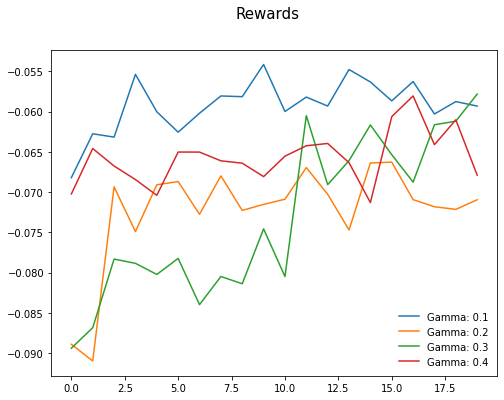

CPU times: user 8min 6s, sys: 11.1 s, total: 8min 17s
Wall time: 7min 56s


In [8]:
%%time
n_episodes_fit = 100000
n_episodes_test = 100000
plot_monte_carlo(env_blackjack, n_episodes_fit=n_episodes_fit, n_episodes_test=n_episodes_test, gammas = [0.1, 0.2, 0.3, 0.4], verbose=True)

## Часть вторая, удвоенная
В базовый блекджек, описанный в предыдущем разделе, обыграть казино вряд ли получится. Но, к счастью, на этом история не заканчивается. Описанные выше правила были упрощёнными, а на самом деле у игрока есть ещё и другие возможности. Реализовывать split может оказаться непросто, поэтому давайте ограничимся удвоением ставки. Итак, у игрока появляется дополнительное действие:\
double — удвоить ставку; при этом больше действий делать нельзя, игроку выдаётся ровно одна дополнительная карта, а выигрыш или проигрыш удваивается.\

Реализуйте новый вариант блекджека на основе окружения Blackjack-v0 из OpenAI Gym, в котором разрешено удвоение ставки.\
Реализуйте метод обучения с подкреплением без модели для этого варианта, постройте графики, аналогичные п.2.




Задание построено так, что каждое следующее окружение может наследовать предыдущее, для этого я немного переписала 'Blackjack-v0' (blackjack.py).\
Здесь и далее буду наследоваться от окружения предыдущего пункта задания и переопределять только методы, которые требуют изменений, в дочернем классе. Реализацию можно посмотреть в blackjack_custom_envs.py.

In [13]:
env_double = BlackjackDouble(natural=True)
env_double.seed = seed 
env_double.action_space.seed = seed

In [14]:
play(env_double, simple_strategy)

([(15, 3, False)], [1], [-1.0])

Gamma: 0.1    Episode: 5000/100000    Reward: -0.048435.
Gamma: 0.1    Episode: 10000/100000    Reward: -0.04323.
Gamma: 0.1    Episode: 15000/100000    Reward: -0.041175.
Gamma: 0.1    Episode: 20000/100000    Reward: -0.039325.
Gamma: 0.1    Episode: 25000/100000    Reward: -0.04195.
Gamma: 0.1    Episode: 30000/100000    Reward: -0.043435.
Gamma: 0.1    Episode: 35000/100000    Reward: -0.040895.
Gamma: 0.1    Episode: 40000/100000    Reward: -0.036175.
Gamma: 0.1    Episode: 45000/100000    Reward: -0.039145.
Gamma: 0.1    Episode: 50000/100000    Reward: -0.042285.
Gamma: 0.1    Episode: 55000/100000    Reward: -0.040775.
Gamma: 0.1    Episode: 60000/100000    Reward: -0.04324.
Gamma: 0.1    Episode: 65000/100000    Reward: -0.03602.
Gamma: 0.1    Episode: 70000/100000    Reward: -0.03422.
Gamma: 0.1    Episode: 75000/100000    Reward: -0.03839.
Gamma: 0.1    Episode: 80000/100000    Reward: -0.04034.
Gamma: 0.1    Episode: 85000/100000    Reward: -0.03871.
Gamma: 0.1    Episode: 

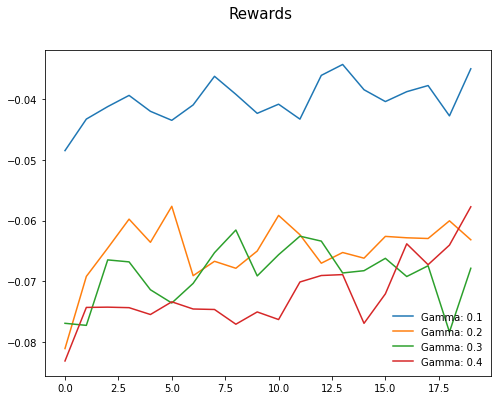

CPU times: user 8min 35s, sys: 12.6 s, total: 8min 48s
Wall time: 8min 24s


In [15]:
%%time
n_episodes_fit = 100000
n_episodes_test = 100000
plot_monte_carlo(env_double, n_episodes_fit=n_episodes_fit, n_episodes_test=n_episodes_test, gammas = [0.1, 0.2, 0.3, 0.4], verbose=True)

## Часть третья, в главной роли — Дастин Хоффман
А теперь давайте вспомним, как играют в блекджек настоящие профессионалы. Дело в том, что в оффлайн-казино обычно не перемешивают колоду после каждой раздачи — это слишком замедляло бы игру. После раздачи карты просто раздаются дальше с верха колоды до тех пор, пока карт не останется слишком мало, и только тогда колода перемешивается; давайте для определённости считать, что наше казино будет перемешивать колоду, в которой осталось меньше 15 карт.


Действительно, если вы будете запоминать, какие карты уже вышли, у вас будет информация о том, какие карты ещё остались, а это позволяет лучше понять, когда нужно удваивать ставку или делать split, а когда лучше не стоит. В настоящем казино могут раздавать карты сразу из нескольких колод, и заслуга Rain Man’а была в том, что он смог считать карты в шести колодах одновременно. Но мы с вами вооружены компьютерами, так что подсчёт можно считать автоматическим.\
Реализуйте вариант окружения Blackjack-v0 из предыдущей части (с удвоением), в котором игрок имеет возможность “считать карты” в колоде. \

Это можно сделать разными способами; возможно, вам поможет статья википедии о блекджеке (а возможно, и нет). \
Реализуйте метод обучения с подкреплением без модели для этого варианта, постройте графики, аналогичные п.2.



In [21]:
env_count = BlackjackCount(natural=True)
env_blackjack.seed = seed
env_blackjack.action_space.seed = seed

In [19]:
play(env_count, simple_strategy)

([(13, 10, False, 0.0), (21, 10, False, 0.0)], [1, 0], [0.0, 1.0])

Увеличу время обучения и возьму большее число параметров

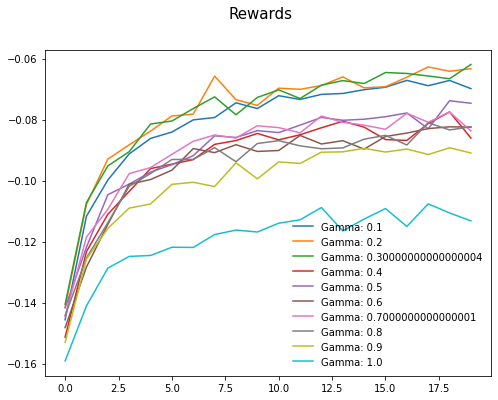

In [27]:
n_episodes_fit = 500000
n_episodes_test = 300000
gammas = np.linspace(0.1, 1, 10)
plot_monte_carlo(env_count, n_episodes_fit=n_episodes_fit, n_episodes_test=n_episodes_test, gammas=gammas, verbose=False)

Gamma: 0.25    Episode: 300000/6000000    Reward: -0.071413.
Gamma: 0.25    Episode: 600000/6000000    Reward: -0.064881.
Gamma: 0.25    Episode: 900000/6000000    Reward: -0.058179.
Gamma: 0.25    Episode: 1200000/6000000    Reward: -0.058728.
Gamma: 0.25    Episode: 1500000/6000000    Reward: -0.060085.
Gamma: 0.25    Episode: 1800000/6000000    Reward: -0.058485.
Gamma: 0.25    Episode: 2100000/6000000    Reward: -0.056735.
Gamma: 0.25    Episode: 2400000/6000000    Reward: -0.056378.
Gamma: 0.25    Episode: 2700000/6000000    Reward: -0.049316.
Gamma: 0.25    Episode: 3000000/6000000    Reward: -0.050992.
Gamma: 0.25    Episode: 3300000/6000000    Reward: -0.049948.
Gamma: 0.25    Episode: 3600000/6000000    Reward: -0.045534.
Gamma: 0.25    Episode: 3900000/6000000    Reward: -0.045608.
Gamma: 0.25    Episode: 4200000/6000000    Reward: -0.046525.
Gamma: 0.25    Episode: 4500000/6000000    Reward: -0.044869.
Gamma: 0.25    Episode: 4800000/6000000    Reward: -0.044118.
Gamma: 0.25

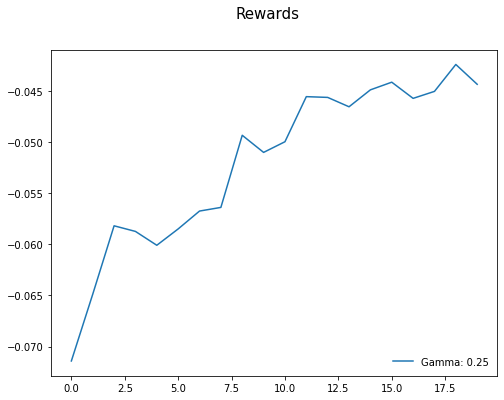

In [31]:
n_episodes_fit = 6000000
n_episodes_test = 500000
gammas = [0.25]
plot_monte_carlo(env_count, n_episodes_fit=n_episodes_fit, n_episodes_test=n_episodes_test, gammas=gammas, verbose=True)

Возможно, при увеличении времени обучения, проигрыш станет меньше, но ситуация выйти хотя бы "в ноль" не выглядит реалистичной.